In [1]:
from pulp import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

In [2]:
node = ['Depot','Toko1','Toko2','Toko3','Toko4','Toko5','Toko6','Toko7','Toko8','Toko9','Toko10']

In [3]:
latlng = ['latitude', 'longitude']

In [4]:
jarak = pd.read_excel(r'C:\Users\Wahri\OneDrive\Documents\Program python\Vehicle Routing Problem\jarak1.xlsx',index_col='Toko')
jarak

,Depot,Toko1,Toko2,Toko3,Toko4,Toko5,Toko6,Toko7,Toko8,Toko9,Toko10
Toko,,,,,,,,,,,
Depot,0.0,15.00,15.50,4.0,14.50,13.80,20.0,17.8,16.6,15.5,17.9
Toko1,15.0,0.00,0.45,14.4,29.10,28.30,34.6,24.4,25.6,24.2,28.1
Toko2,15.5,0.45,0.00,14.9,29.60,28.80,35.1,24.9,26.0,26.1,28.5
Toko3,4.0,14.40,14.90,0.0,18.10,17.30,23.6,21.4,20.2,19.1,21.5
Toko4,14.5,29.10,29.60,18.1,0.00,0.75,5.5,17.4,16.1,15.1,13.0
Toko5,13.8,28.30,28.80,17.3,0.75,0.00,6.3,16.6,17.1,14.3,12.3
Toko6,20.0,34.60,35.10,23.6,5.50,6.30,0.0,21.5,20.3,19.2,15.5
Toko7,17.8,24.40,24.90,21.4,17.40,16.60,21.5,0.0,1.2,2.3,6.1
Toko8,16.6,25.60,26.00,20.2,16.10,17.10,20.3,1.2,0.0,1.1,4.8


In [5]:
koordinat = pd.read_excel('koordinat1.xlsx',index_col='Toko')
koordinat

,latitude,longitude
Toko,,
Depot,106151813,-6139657
Toko1,106073113,-6152083
Toko2,106069120,-6153256
Toko3,106132691,-6136691
Toko4,106122794,-6248552
Toko5,106125140,-6242065
Toko6,106128359,-6289812
Toko7,106215285,-6171872
Toko8,106213150,-6182480


In [6]:
waktu_perjalanan = pd.read_excel('waktuperjalanan.xlsx',index_col='Toko')

In [7]:
waktu_perjalanan

,Depot,Toko1,Toko2,Toko3,Toko4,Toko5,Toko6,Toko7,Toko8,Toko9,Toko10
Toko,,,,,,,,,,,
Depot,0.0,20.0,20.7,5.3,19.3,18.4,26.7,23.7,22.1,20.7,23.9
Toko1,20.0,0.0,0.6,19.2,38.8,37.7,46.1,32.5,34.1,32.3,37.5
Toko2,20.7,0.6,0.0,19.9,39.5,38.4,46.8,33.2,34.7,34.8,38.0
Toko3,5.3,19.2,19.9,0.0,24.1,23.1,31.5,28.5,26.9,25.5,28.7
Toko4,19.3,38.8,39.5,24.1,0.0,1.0,7.3,23.2,21.5,20.1,17.3
Toko5,18.4,37.7,38.4,23.1,1.0,0.0,8.4,22.1,22.8,19.1,16.4
Toko6,26.7,46.1,46.8,31.5,7.3,8.4,0.0,28.7,27.1,25.6,20.7
Toko7,23.7,32.5,33.2,28.5,23.2,22.1,28.7,0.0,1.6,3.1,8.1
Toko8,22.1,34.1,34.7,26.9,21.5,22.8,27.1,1.6,0.0,1.5,6.4


In [8]:
#make some positions (so we can plot this)
koordinats = dict( ( Toko, (koordinat.loc[Toko, 'longitude'], koordinat.loc[Toko, 'latitude']) ) for Toko in node)

In [9]:
koordinats

{'Depot': (-6139657, 106151813),
 'Toko1': (-6152083, 106073113),
 'Toko2': (-6153256, 106069120),
 'Toko3': (-6136691, 106132691),
 'Toko4': (-6248552, 106122794),
 'Toko5': (-6242065, 106125140),
 'Toko6': (-6289812, 106128359),
 'Toko7': (-6171872, 106215285),
 'Toko8': (-6182480, 106213150),
 'Toko9': (-6192101, 106211224),
 'Toko10': (-6224255, 106207123)}

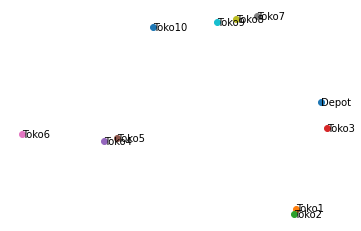

In [10]:
for s in koordinats:
    p = koordinats[s]
    plt.plot(p[0],p[1],'o')
    plt.text(p[0]+.5,p[1],s,horizontalalignment='left',verticalalignment='center')
    
plt.gca().axis('off');

In [11]:
# definisikan jarak dari setiap node
jaraks = dict( ((s1,s2), jarak.loc[s1, s2] ) for s1 in koordinats for s2 in koordinats if s1!=s2)

In [12]:
jaraks

{('Depot', 'Toko1'): 15.0,
 ('Depot', 'Toko2'): 15.5,
 ('Depot', 'Toko3'): 4.0,
 ('Depot', 'Toko4'): 14.5,
 ('Depot', 'Toko5'): 13.8,
 ('Depot', 'Toko6'): 20.0,
 ('Depot', 'Toko7'): 17.8,
 ('Depot', 'Toko8'): 16.6,
 ('Depot', 'Toko9'): 15.5,
 ('Depot', 'Toko10'): 17.9,
 ('Toko1', 'Depot'): 15.0,
 ('Toko1', 'Toko2'): 0.45,
 ('Toko1', 'Toko3'): 14.4,
 ('Toko1', 'Toko4'): 29.1,
 ('Toko1', 'Toko5'): 28.3,
 ('Toko1', 'Toko6'): 34.6,
 ('Toko1', 'Toko7'): 24.4,
 ('Toko1', 'Toko8'): 25.6,
 ('Toko1', 'Toko9'): 24.2,
 ('Toko1', 'Toko10'): 28.1,
 ('Toko2', 'Depot'): 15.5,
 ('Toko2', 'Toko1'): 0.45,
 ('Toko2', 'Toko3'): 14.9,
 ('Toko2', 'Toko4'): 29.6,
 ('Toko2', 'Toko5'): 28.8,
 ('Toko2', 'Toko6'): 35.1,
 ('Toko2', 'Toko7'): 24.9,
 ('Toko2', 'Toko8'): 26.0,
 ('Toko2', 'Toko9'): 26.1,
 ('Toko2', 'Toko10'): 28.5,
 ('Toko3', 'Depot'): 4.0,
 ('Toko3', 'Toko1'): 14.4,
 ('Toko3', 'Toko2'): 14.9,
 ('Toko3', 'Toko4'): 18.1,
 ('Toko3', 'Toko5'): 17.3,
 ('Toko3', 'Toko6'): 23.6,
 ('Toko3', 'Toko7'): 21.4,


In [13]:
#create the problme
prob=LpProblem("vehicle", LpMinimize)

In [14]:
#indicator variable if site i is connected to site j in the tour
x = LpVariable.dicts('x',jaraks, 0,1,LpBinary)
#dummy vars to eliminate subtours
u = LpVariable.dicts('u', node, 0, len(node)-1, LpInteger)

In [15]:
K=1 #hari kerja

In [16]:
#the objective
cost = lpSum([x[(i,j)]*jaraks[(i,j)] for (i,j) in jaraks])
prob+=cost



In [17]:
#constraints
for k in node:
    cap = 1 if k!= 'Depot' else K
    #inbound connection
    prob+= lpSum([ x[(i,k)] for i in node if (i,k) in x]) ==cap
    #outbound connection
    prob+=lpSum([ x[(k,i)] for i in node if (k,i) in x]) ==cap
    
#subtour elimination
N=len(node)/K
for i in node:
    for j in node:
        if i != j and (i != 'Depot' and j!= 'Depot') and (i,j) in x:
            prob += u[i] - u[j] <= (N)*(1-x[(i,j)]) - 1

In [18]:
%time prob.solve()
print(LpStatus[prob.status])

Wall time: 1.23 s
Optimal


In [19]:
non_zero_edges = [ e for e in x if value(x[e]) != 0 ]

def get_next_node(parent):
    '''helper function to get the next edge'''
    edges = [e for e in non_zero_edges if e[0]==parent]
    for e in edges:
        non_zero_edges.remove(e)
    return edges

In [20]:
tours = get_next_node('Depot')
tours = [ [e] for e in tours ]

for t in tours:
    while t[-1][1] !='Depot':
        t.append(get_next_node(t[-1][1])[-1])

In [21]:
tours

[[('Depot', 'Toko5'),
  ('Toko5', 'Toko4'),
  ('Toko4', 'Toko6'),
  ('Toko6', 'Toko10'),
  ('Toko10', 'Toko9'),
  ('Toko9', 'Toko8'),
  ('Toko8', 'Toko7'),
  ('Toko7', 'Toko2'),
  ('Toko2', 'Toko1'),
  ('Toko1', 'Toko3'),
  ('Toko3', 'Depot')]]

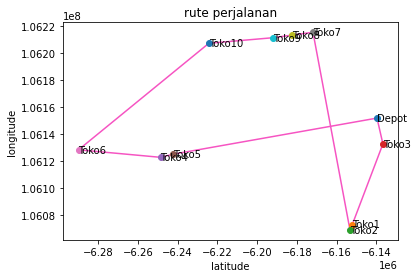

In [22]:
#draw the tours
colors = [np.random.rand(3) for i in range(len(tours))]
for t,c in zip(tours,colors):
    for a,b in t:
        p1,p2 = koordinats[a], koordinats[b]
        plt.plot([p1[0],p2[0]],[p1[1],p2[1]], color=c)

#draw the map again
for s in koordinats:
    p = koordinats[s]
    plt.plot(p[0],p[1],'o')
    plt.text(p[0]+.01,p[1],s,horizontalalignment='left',verticalalignment='center')
    
plt.title('rute perjalanan')
plt.xlabel('latitude')
plt.ylabel('longitude')
# plt.gca().axis('off')
plt.show()

In [23]:
totalTime = 0;
for t in tours:
    time = 0
    for i in range(0, len(t)):
        time += waktu_perjalanan.loc[t[i][0], t[i][1]]
#        print(waktu_perjalanan.loc[t[i][0], t[i][1]])
#        print(time)
    if time > totalTime:
        totalTime = time
print(totalTime)

113.9


In [24]:
print('Longest time spent:', totalTime, '(min)')
print('Total distance:', value(prob.objective), '(km)')

Longest time spent: 113.9 (min)
Total distance: 85.4 (km)
